# Day 1

Associated learning goal: Understand what a digital image is and how it is commonly represented as bits and bytes.
- Loading and viewing images
    - Load image into iPython notebook
    - view image in iPython notebook
    - get bit depth of image
- Indexing and arrays
    - Print a subset of pixel values (such as the top right corner)
    - Set that subset of values to 0
    - View the modified image in iPython
- Histogram the pixel values in the image
- Color maps and color science
- File size, disk space, and memory
    - Report the size of the file on the disk
    - Report the size of the file read into memory
    - Save the file in another format (png, maybe?) and then report the file size on disk

First some boilerplate code to make it easier to access useful libraries, and to make it easier to visualize data in the notebook.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now the `numpy` numerical array library is available as `np`. Plotting functions are available with `plt`, and `seaborn`'s advanced plots are accessed through `sns`. Just importing `seaborn` at all makes `Matplotlib` look nicer.

Let's set some defaults for the packages we just imported

In [3]:
sns.set_style("dark") # This gets rid of grid line on our image plots!

## Loading and viewing images

### Load image into Jupyter notebook

In [4]:
from skimage.io import imread

In [5]:
imread?

In [6]:
!ls

Batch processing strategies.ipynb
Day 1 - digital images.ipynb
Errors.ipynb
Image Quantification.ipynb
Morphological operations.ipynb
Preprocessing part1 - global thresholds.ipynb
Preprocessing part2 - rank filters.ipynb
Region Properties.ipynb
Test cases.ipynb
Tracking and meditations on pipeline design.ipynb


In [7]:
image_path = "../data/8bit_im.tif"

In [8]:
data = imread(image_path)

In [9]:
data.shape

(2249, 2249)

These are the image dimensions. Since `data` is `numpy` array, as we will appreciate soon, its shape is described like you might describe a mathematical matrix: row-by-column. Rows are arranged vertically, and columns horizontally, so that a row-by-column description is height-by-width in image speak. Keep this in mind - for some it's more natural to refer to width-by-height, but that's not how things work here!

### Exercise: Practice using jupyter notebooks

### Get bit depth of image

In [10]:
data.dtype

dtype('uint8')

`uint8` means "unsigned (not negative) integer with 8 bits per pixel".

8 bits means there are $2^{8} = 256$ possible pixel values. Many scientific images will use 12 or even 16 bits to give $2^{16} = 65536$ levels - much more contrast!

### View image in iPython notebook

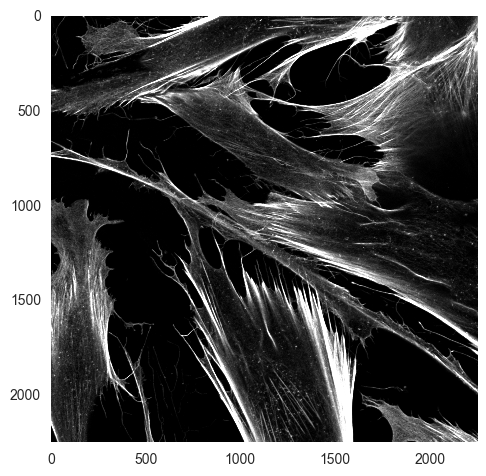

In [11]:
plt.imshow(data, cmap='gray')

We had to specify how we wanted our colorless image to be rendered on our colorful screen, which is why we included `cmap=gray` (cmap for colormap).

We will talk more about colormaps and channels later.

## Indexing and arrays

### Print a subset of pixel values 

How would we index into the upper left-most pixel?

In [12]:
data[0,0]

11

What about the lower left?

In [13]:
data[-1,0] # row -1 aka last, column 0

0

What about a 10x10 slice from the upper right?

In [14]:
data[0:10,-10:-1] # row from 0 to 10 (not inclusive for 10! and column 10th-from-last to last

array([[ 61,  60,  56,  53,  59,  49,  61,  64,  63],
       [ 49,  53,  48,  62,  51,  60,  55,  62,  73],
       [ 58,  50,  47,  56,  62,  65,  72,  73,  69],
       [ 56,  47,  40,  50,  50,  68,  67,  74, 100],
       [ 42,  51,  53,  61,  71,  59,  73,  88,  99],
       [ 44,  53,  60,  62,  74,  81,  79,  91, 100],
       [ 57,  59,  52,  61,  72,  77,  91,  95,  97],
       [ 50,  52,  59,  70,  78,  81,  95, 104, 115],
       [ 57,  49,  61,  72,  87,  96, 104,  91,  96],
       [ 65,  63,  67,  82,  75,  94, 104, 104,  96]], dtype=uint8)

Does this look like the upper left?

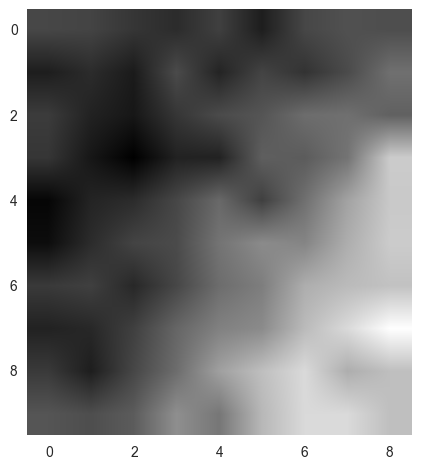

In [15]:
plt.imshow(data[0:10,-10:-1], cmap='gray')

Why is it so blurry? Remember we're only looking at 100 pixels here, but the image is more than 100 pixels on our screen. Matplotlib is trying to deal with this by _interpolating_, but has chosen to do this in a funny way. Let's be explicit about how we want Matplotlib to interpolate.

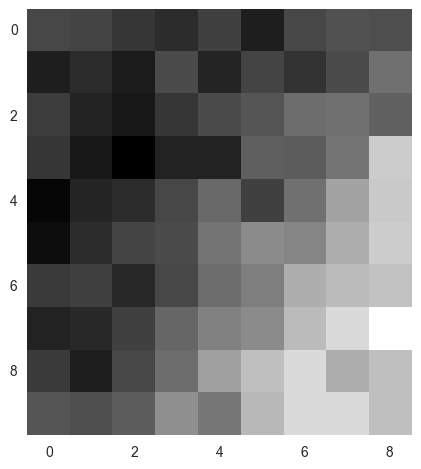

In [16]:
plt.imshow(data[0:10,-10:-1], cmap='gray', interpolation='nearest')

Note that ranges of indices are exclusive on the high side, inclusive on the low. What happens if I have a slice `1:2`?

In [17]:
data[1:2, 1:2]

array([[10]], dtype=uint8)

We get row and column "from 1, up to (but not including) 2". This is the same as `data[1,1]`.

To save some typing when slicing into your data, we can leave off the value before the colon, meaning (to the beginning). Leaving off the value after means (to the end).

In [18]:
data[:10,-10:]

array([[ 61,  60,  56,  53,  59,  49,  61,  64,  63,  70],
       [ 49,  53,  48,  62,  51,  60,  55,  62,  73,  89],
       [ 58,  50,  47,  56,  62,  65,  72,  73,  69,  75],
       [ 56,  47,  40,  50,  50,  68,  67,  74, 100, 115],
       [ 42,  51,  53,  61,  71,  59,  73,  88,  99,  85],
       [ 44,  53,  60,  62,  74,  81,  79,  91, 100,  98],
       [ 57,  59,  52,  61,  72,  77,  91,  95,  97, 100],
       [ 50,  52,  59,  70,  78,  81,  95, 104, 115, 114],
       [ 57,  49,  61,  72,  87,  96, 104,  91,  96,  95],
       [ 65,  63,  67,  82,  75,  94, 104, 104,  96, 105]], dtype=uint8)

### Set that subset of values to 0 

Let's not ruin our original by making a copy!

In [19]:
modified_data = data.copy()

We've viewed data using slicing, now let's set data using slicing!

In [20]:
modified_data[:1000,-1000:] = 0

Even though `modified_data[:1000,:1000]` is a 1000x1000 array, and 0 is just a scalar, `numpy` is smart and will _broadcast_ the 1x1 value `0` so that the whole 1000x1000 array is set to a 100x100 array of zeros.

### View the modified image

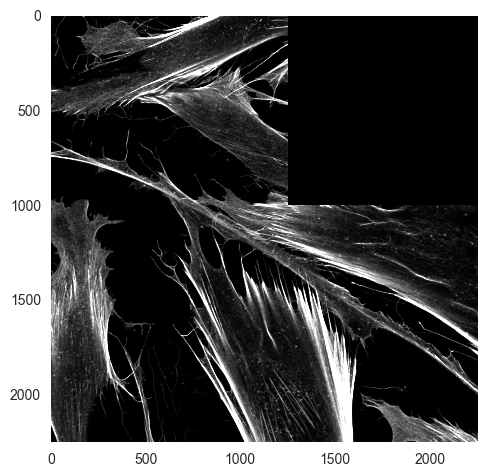

In [21]:
plt.imshow(modified_data, cmap='gray')

### Exercise: import and view the sample dataset

## Histogram the pixel values in the image 

Pixels in an image are just represented by numbers. We can get a sense for the distribution of brightness in our image by looking at a histogram of intensities. Here we don't think about an image as representing something spacial - just a collection of numbers.

In [22]:
# make our array into a simple 1D list of data
flat_data = data.flatten()

C:\Users\Sukrit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


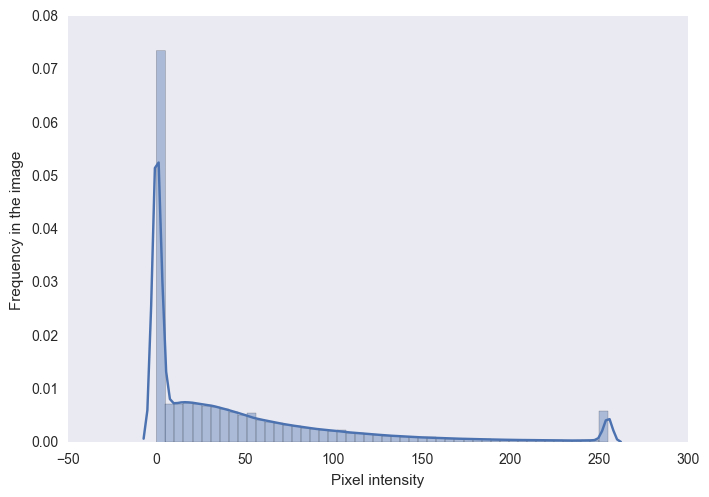

In [23]:
sns.distplot(flat_data)
plt.xlabel("Pixel intensity")
plt.ylabel("Frequency in the image")

Note the spike around 250. That indicates saturation. Some pixels exceeded the maximum intensity value of 255 and were recorded as 255. This is very hard to see visually, but obvious in the image histogram, whose many uses will be discussed later.

## Color science 

If we wanted to visualize things in a more striking way, with false colors and more contrast, we could use a different colormap.

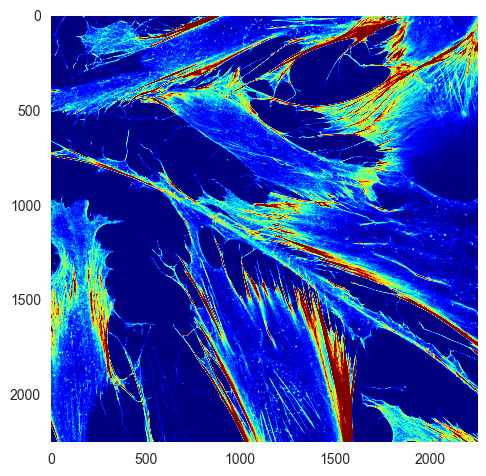

In [24]:
plt.imshow(data, cmap='jet')

Jet is a bad colormap because it is perceptually non-uniform.

In [25]:
from IPython.display import Image # Access IPython's browser-based image display.

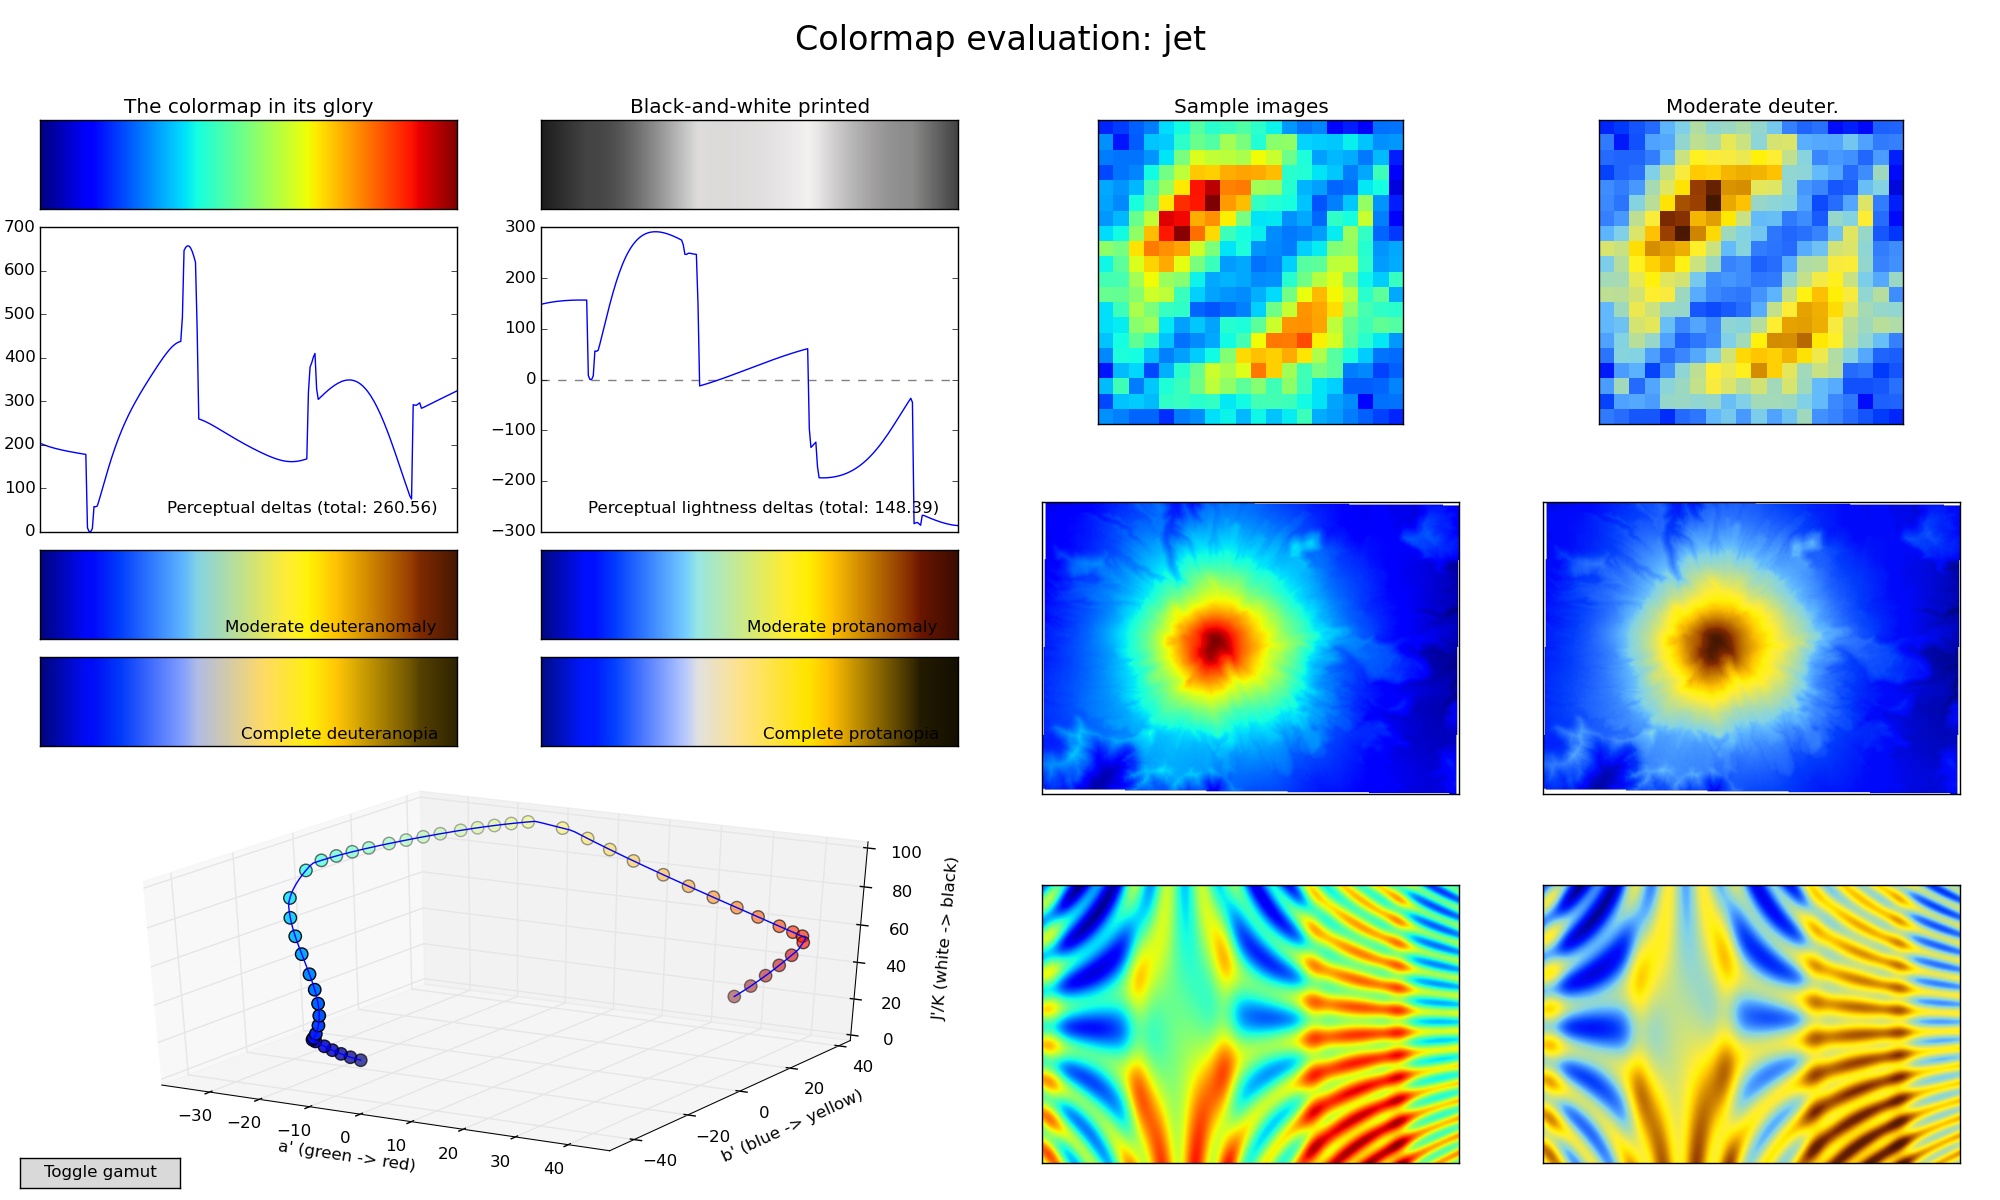

In [26]:
Image("../fig/jet.png") # Quickly display a diagram we saved in a file

The jumps in the "perceptual deltas" plot are values where this colormap makes it look like sharp transitions occur when they do not. Colorbind users rely more on lightness than hue, and will be especially misled.

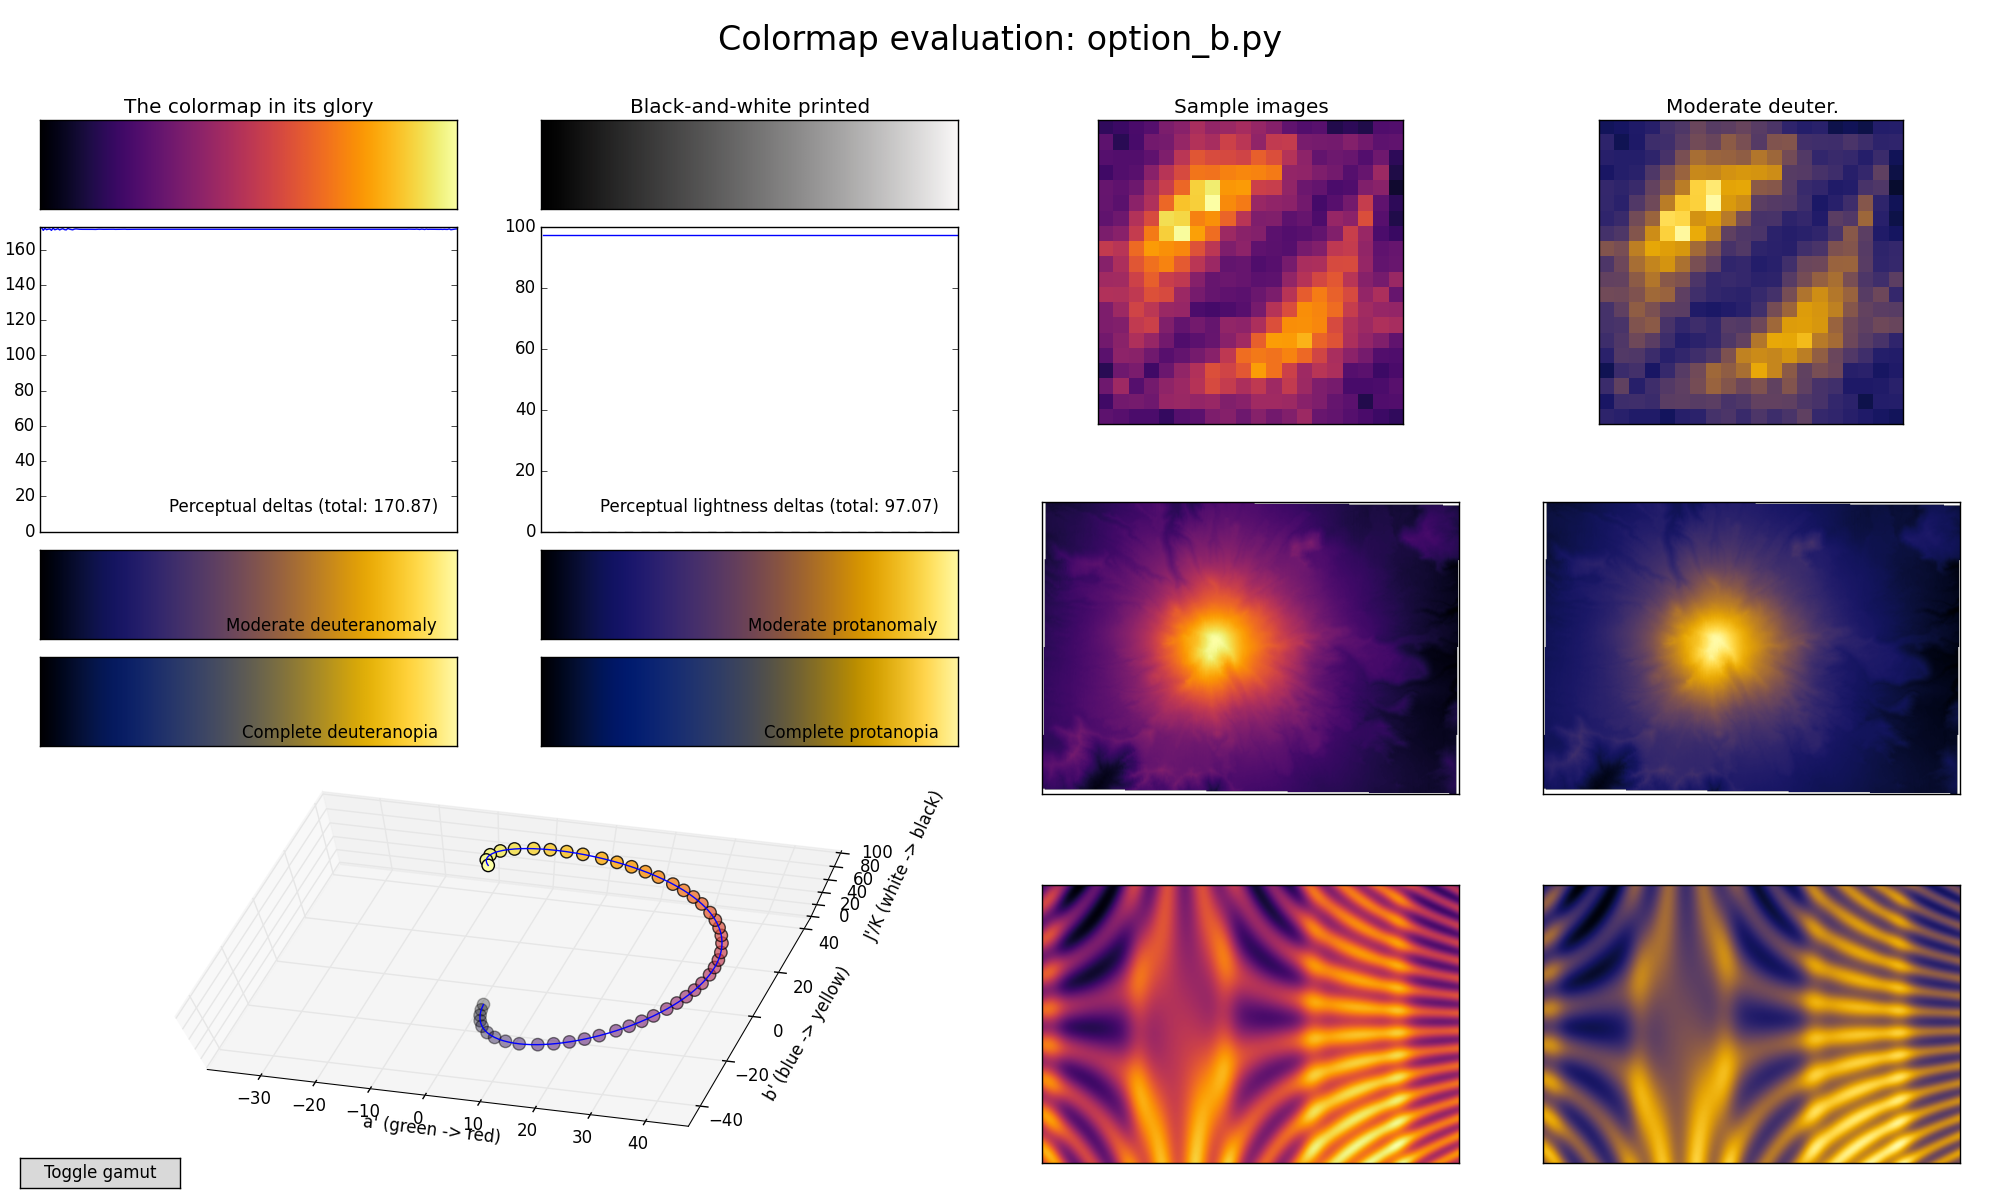

In [27]:
Image("../fig/option_b.png")

This colormap is perceptually uniform by design! It looks cool too.

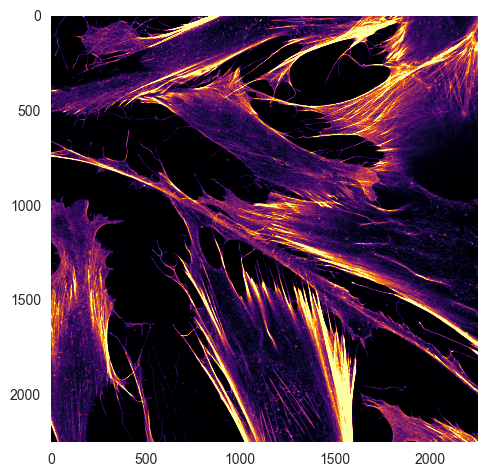

In [28]:
plt.imshow(data, cmap='inferno')

### Exercise: Look up documentation for colormaps, changing colormaps, and changing contrast

## File size, disk space, and memory 

### Report the size of the file on the disk 

Pro tip: a leading `!` in a notebook drops you into bash.

In [29]:
# a human-readable description of the image file we've been using
!ls -lh "../data/8bit_im.tif"

-rw-r--r-- 1 Sukrit 197609 4.9M Oct 16 13:24 ../data/8bit_im.tif


ls: cannot access '#': No such file or directory
ls: cannot access 'a': No such file or directory
ls: cannot access 'human-readable': No such file or directory
ls: cannot access 'description': No such file or directory
ls: cannot access 'of': No such file or directory
ls: cannot access 'the': No such file or directory
ls: cannot access 'image': No such file or directory
ls: cannot access 'file': No such file or directory
ls: cannot access 'weve been using': No such file or directory


Note the "4.9M". That's our file size.

### Report the size of the file read into memory 

In [30]:
data.nbytes

5058001

What is this in MB?

In [31]:
data.nbytes / 1024.**2 # 1K = 1024 bytes, 1M = 1024K

4.823685646057129

So our image on-disk and loaded into Python are the same size. Therefore, this was an _uncompressed_ or _raw_ tif. Such files are quick to read and write, but take up lots of space on your hard drive. Image files always take up $bitdepth \times x \times y \times z$ in memory.

### Save an image in a different format from its original

In [32]:
from skimage.io import imsave

In [33]:
imsave?

In [34]:
imsave("../data/8bit_im.jpg", data)

`Matplotlib` sees that you used the `.jpg` extension, and guesses that you want to apply jpeg compression to the image and save it in the jpeg format. There are ways to be more explicit about this (for example, specifying the bit-depth of a TIFF).

In [35]:
!ls -lh "../data/8bit_im.jpg"

-rw-r--r-- 1 Sukrit 197609 552K Oct 16 13:33 ../data/8bit_im.jpg


This image is only 0.5M, but has sustained _loss_. Even if you can't see it, when you load this image, it will differ ever so slightly from the original.

The other reason jpegs may be smaller is that they only support 8-bit data, so converting a standard 16-bit TIFF from your microscope to a jpeg is probably a **Bad Idea**.

In [36]:
data_from_jpg = imread("../data/8bit_im.jpg")

In [37]:
np.all(data_from_jpg == data) # check for equality pixel by pixel. Are they all the same?

False

In [38]:
np.all(imread("../data/8bit_im.tif") == data) # check this on our original TIFF file too.

True

The two images differ - can we visualize this? Let's subtract the two images from eachother. Careful...

In [39]:
difference_image = data_from_jpg.astype('int') - data.astype('int')

The result of subtracting two images can be negative in some places. However our images have unsigned integer types, and the difference image will inherit this and be unable to represent the negatives! To get around this, we use `astype` to interpret our image as regular signed integers before subtracting.

To make both positive and negative values obvious, we will use a colormap that diverges from zero: blue is negative, red positive, zero white. We will also need to make sure that `imshow` actually maps zero to white. To ensure this, we'll find the most extreme value in the image, and set the `vmin` and `vmax` arguments - the bottom and top of the colormap - symmetrically.

In [40]:
max_divergence = np.max(abs(difference_image))

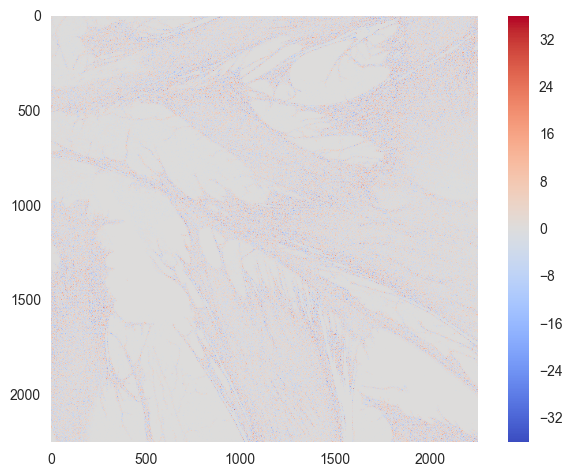

In [41]:
plt.imshow(difference_image, cmap='coolwarm', vmin=-max_divergence, vmax=max_divergence)
plt.colorbar()

The pixelwise loss can be as large as 32 levels, which is 1/8th of the available contrast! **Don't save your data as jpegs.**